<a href="https://colab.research.google.com/github/in123-new/machine-learning/blob/main/ML_Classifieur_Na%C3%AFf_de_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TP 02 Machine Learning : Classifieur Naïf de Bayes**



*   Sarah BOUARABA
*   Insaf MEDJAOURI

---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

*Reading & Understanding Data*

In [ ]:
#Chemin vers le fichier
path = 'adult_data.csv'

In [ ]:
#Read the file
data_set = pd.read_csv(path)

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   education       32560 non-null  object
 3   education_num   32560 non-null  int64 
 4   marital_status  32560 non-null  object
 5   occupation      32560 non-null  object
 6   relationship    32560 non-null  object
 7   race            32560 non-null  object
 8   sex             32560 non-null  object
 9   capital_gain    32560 non-null  int64 
 10  capital_loss    32560 non-null  int64 
 11  hours_per_week  32560 non-null  int64 
 12  native_country  32560 non-null  object
 13  income          32560 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [ ]:
#A fonction for resume tables

def resume_table(data):
    #print(f'Data Shape: {data.shape}')
    summary = (pd
               .DataFrame(data.dtypes, columns=['dtypes'])
               .reset_index()
               .rename(columns={'index': 'name'}))
    summary.loc[:, 'missing'] = data.isna().sum().values
    summary.loc[:, '%missing'] = np.round(summary.missing / data.shape[0] * 100, 2)
    summary.loc[:, 'uniques'] = data.nunique().values
    return summary, data.shape

In [ ]:
resume_table(data_set)

(              name  dtypes  missing  %missing  uniques
 0              age   int64        0       0.0       73
 1        workclass  object        0       0.0        9
 2        education  object        0       0.0       16
 3    education_num   int64        0       0.0       16
 4   marital_status  object        0       0.0        7
 5       occupation  object        0       0.0       15
 6     relationship  object        0       0.0        6
 7             race  object        0       0.0        5
 8              sex  object        0       0.0        2
 9     capital_gain   int64        0       0.0      119
 10    capital_loss   int64        0       0.0       92
 11  hours_per_week   int64        0       0.0       94
 12  native_country  object        0       0.0       42
 13          income  object        0       0.0        2, (32560, 14))

On n'a pas de données manquantes

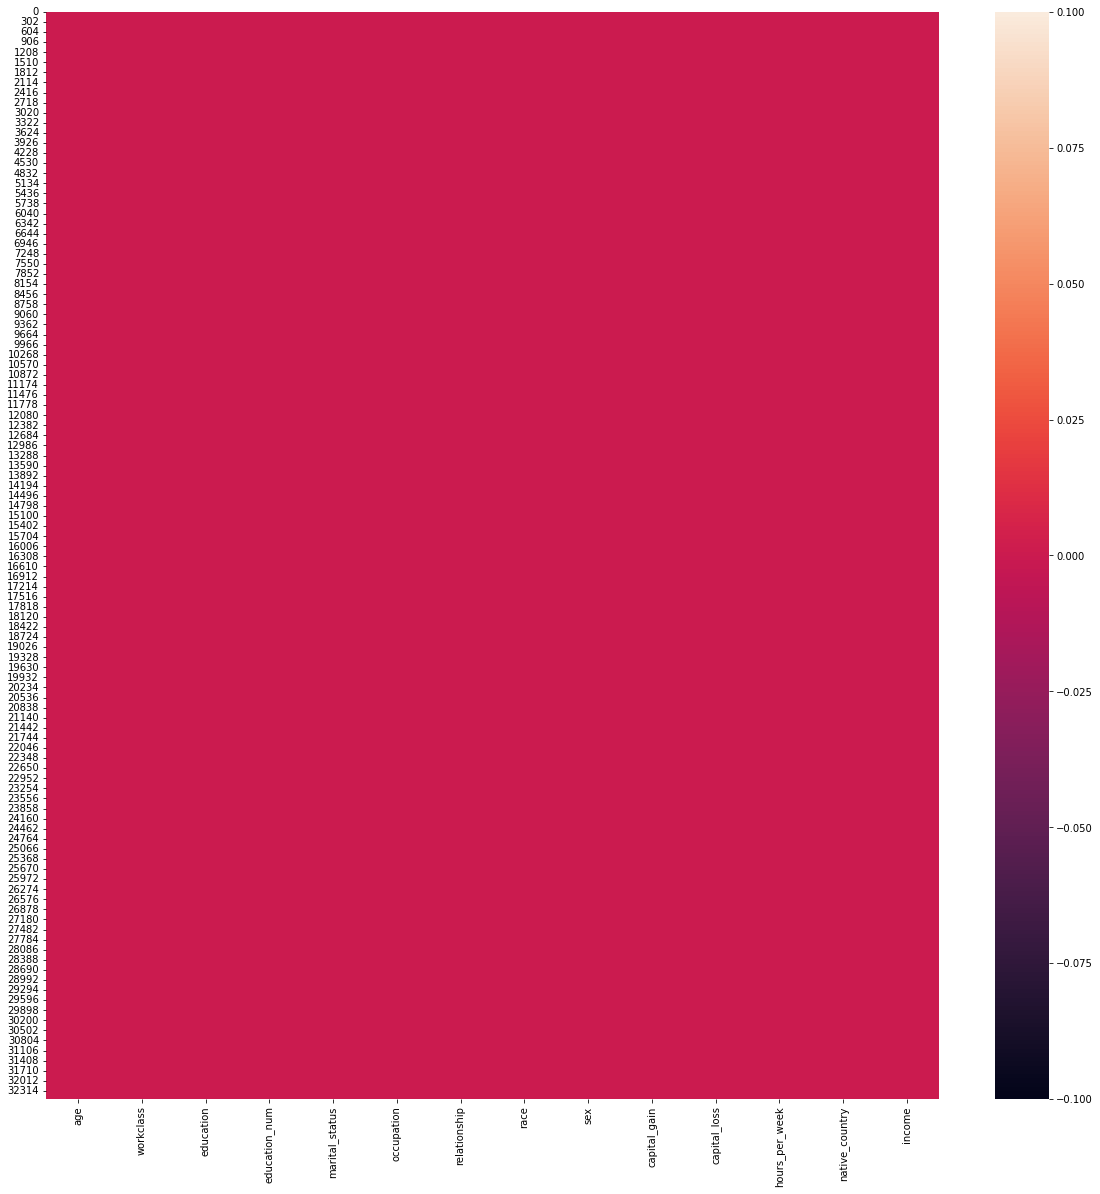

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data_set.isna())

In [ ]:
data_set

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


*Data Cleaning*

In [ ]:
#Vérification des données catégoriques
data_set.value_counts('workclass')

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
dtype: int64

Une anomalie "?" détectée !

In [ ]:
data_set.value_counts('marital_status')

marital_status
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
dtype: int64

In [ ]:
data_set.value_counts('relationship')

relationship
 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
dtype: int64

In [ ]:
data_set.value_counts('occupation')

occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
dtype: int64

Une anomalie "?" détectée !

In [ ]:
data_set.value_counts('race')

race
 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
dtype: int64

In [ ]:
data_set.value_counts('sex')

sex
 Male      21789
 Female    10771
dtype: int64

In [ ]:
data_set.value_counts('income')

income
 <=50K    24719
 >50K      7841
dtype: int64

In [ ]:
data_set.value_counts('native_country')

native_country
 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

native_country
 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

Une anomalie "?" détectée !

In [ ]:
#Traitement des anomalies
data_set.workclass.replace(' ?',np.NaN, inplace=True)
data_set.occupation.replace(' ?',np.NaN, inplace=True)
data_set.native_country.replace(' ?',np.NaN, inplace=True)

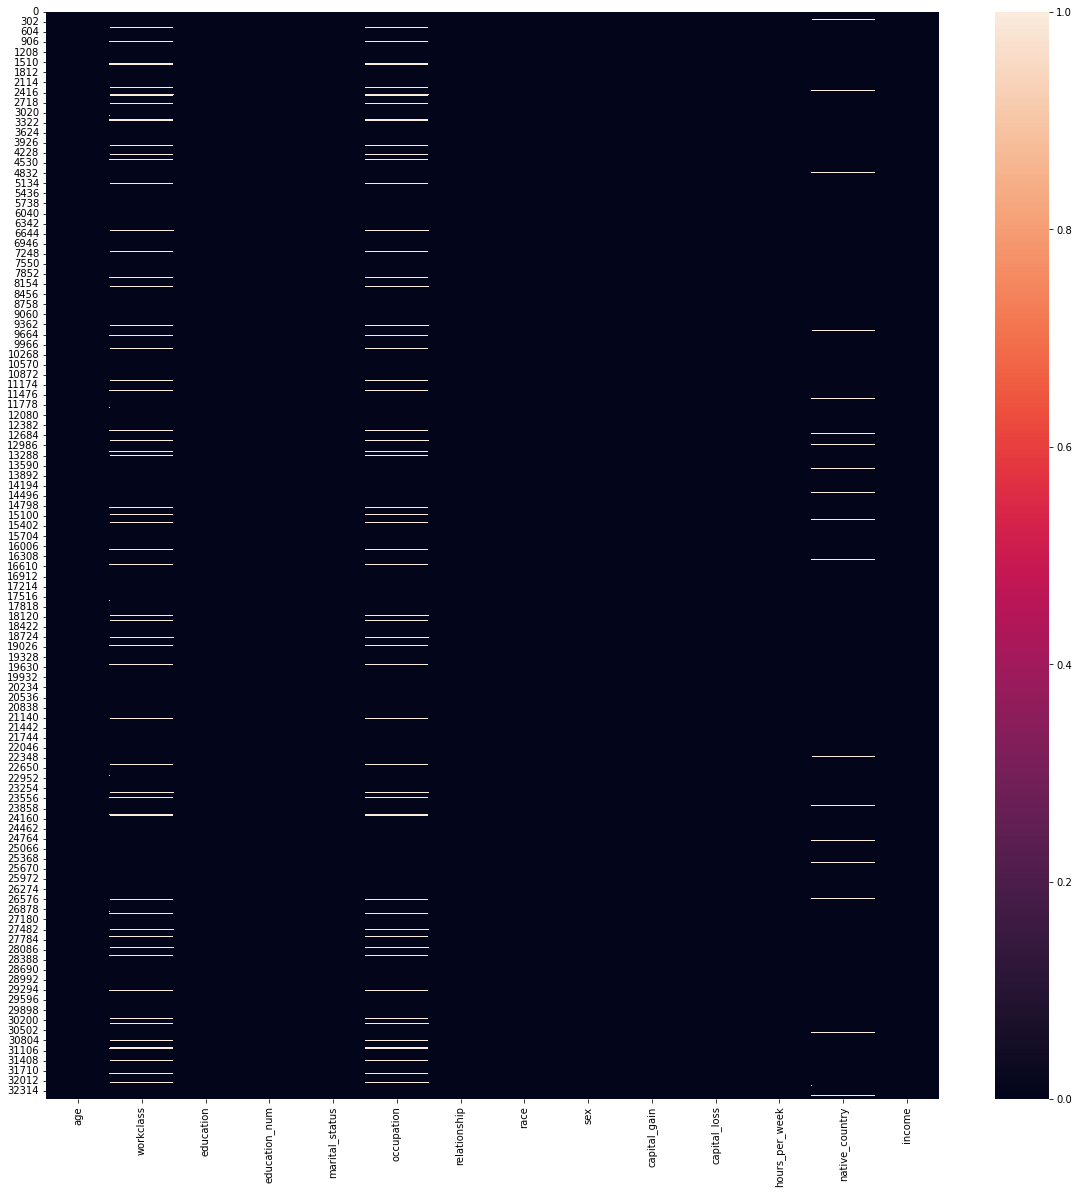

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data_set.isna())

In [ ]:
resume_table(data_set)

(              name  dtypes  missing  %missing  uniques
 0              age   int64        0      0.00       73
 1        workclass  object     1836      5.64        8
 2        education  object        0      0.00       16
 3    education_num   int64        0      0.00       16
 4   marital_status  object        0      0.00        7
 5       occupation  object     1843      5.66       14
 6     relationship  object        0      0.00        6
 7             race  object        0      0.00        5
 8              sex  object        0      0.00        2
 9     capital_gain   int64        0      0.00      119
 10    capital_loss   int64        0      0.00       92
 11  hours_per_week   int64        0      0.00       94
 12  native_country  object      583      1.79       41
 13          income  object        0      0.00        2, (32560, 14))

Les données sont devenue manquantes ! On doit remédier à ce problème

In [ ]:
data_set.dropna(axis=0,inplace=True)

In [ ]:
resume_table(data_set)

(              name  dtypes  missing  %missing  uniques
 0              age   int64        0       0.0       72
 1        workclass  object        0       0.0        7
 2        education  object        0       0.0       16
 3    education_num   int64        0       0.0       16
 4   marital_status  object        0       0.0        7
 5       occupation  object        0       0.0       14
 6     relationship  object        0       0.0        6
 7             race  object        0       0.0        5
 8              sex  object        0       0.0        2
 9     capital_gain   int64        0       0.0      118
 10    capital_loss   int64        0       0.0       90
 11  hours_per_week   int64        0       0.0       94
 12  native_country  object        0       0.0       41
 13          income  object        0       0.0        2, (30161, 14))

*Data Splitting*

In [ ]:
x = data_set.drop(['income'],axis=1)
y = data_set.income

In [ ]:
x

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32556,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32557,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32558,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [ ]:
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32555     <=50K
32556      >50K
32557     <=50K
32558     <=50K
32559      >50K
Name: income, Length: 30161, dtype: object

Codage des données

In [ ]:
#Changer le type de variable de object à int pour que le modèle puisse les comprendre

X_all = pd.get_dummies(x)

In [ ]:
print(x.shape)

(30161, 13)


In [ ]:
print(X_all.shape)

(30161, 103)


In [ ]:
X_all

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,14,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32556,40,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,22,9,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#LabelEncoder
from sklearn.preprocessing import LabelEncoder
x_label = x.apply(LabelEncoder().fit_transform)
x_label.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,33,4,9,12,2,3,0,4,1,0,0,12,38
1,21,2,11,8,0,5,1,4,1,0,0,39,38
2,36,2,1,6,2,5,0,2,1,0,0,39,38
3,11,2,9,12,2,9,5,2,0,0,0,39,4
4,20,2,12,13,2,3,5,4,0,0,0,39,38


In [ ]:
#Splitting dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=5)

In [ ]:
X_train.shape, X_test.shape

((24128, 103), (6033, 103))

**Partie 01 : GussianNB Modelisation**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
gnb.score(X_test, y_test)

0.8032487982761478

In [ ]:
y_test_pred = gnb.predict(X_test)

In [ ]:
y_test_pred.shape

(6033,)

In [ ]:
#Cross Validation 
from sklearn.model_selection import cross_val_score
gnb = GaussianNB()
cross_val_score(gnb,X_train,y_train,cv=5,scoring='accuracy')

array([0.80252797, 0.80853709, 0.80584335, 0.79274611, 0.80974093])

In [ ]:
gnb.fit(X_train,y_train)

GaussianNB()

In [ ]:
##Evaluation du modèle

#accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_test_pred))

0.8032487982761478


In [ ]:
#matrice de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[3651,  919],
       [ 268, 1195]])

<function matplotlib.pyplot.show>

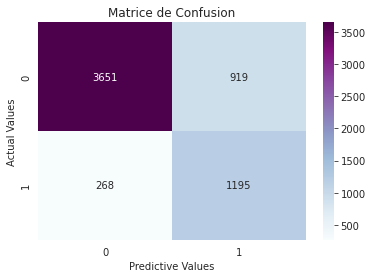

In [ ]:
sns.heatmap(cm,annot=True,fmt='g', cmap= 'BuPu')
plt.xlabel('Predictive Values')
plt.ylabel('Actual Values')
plt.title('Matrice de Confusion')
plt.show

Interpretation : 
* 00 : Vrai Négatif "TN" (les prédictions et les valeurs réelles sont les memes et sont effectivement négativess)
* 01 : Faux Négatif "FN" (les prédictions et les valeurs réelles sont différentes et sont effectivement négatives)
* 10 : Faux Positif "FP" (les prédictions et les valeurs réelles sont différentes et sont effectivement positives)
* 11 : Vrai Positif TP" (les prédictions et les valeurs réelles sont les memes et sont effectivement positives)

In [ ]:
 #Rapport de classification 
 from sklearn.metrics import classification_report
 print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86      4570
        >50K       0.57      0.82      0.67      1463

    accuracy                           0.80      6033
   macro avg       0.75      0.81      0.76      6033
weighted avg       0.84      0.80      0.81      6033



In [ ]:
print(X_test.shape)

(6033, 103)


In [ ]:
#ROC Curve

#Codage de la variable cible
y_test.unique()

array([' <=50K', ' >50K'], dtype=object)

In [ ]:
y_test_roc=y_test.replace([' <=50K', ' >50K'],[0,1])
y_test_roc.unique()

array([0, 1])

In [ ]:
#Obtenir le score de prédiction

y_pred_roc=gnb.predict_proba(X_test)
y_pred_roc

array([[9.99999782e-01, 2.18197314e-07],
       [9.10559764e-01, 8.94402362e-02],
       [9.91301915e-01, 8.69808459e-03],
       ...,
       [2.16249846e-03, 9.97837502e-01],
       [9.99999536e-01, 4.63655800e-07],
       [1.33762591e-01, 8.66237409e-01]])

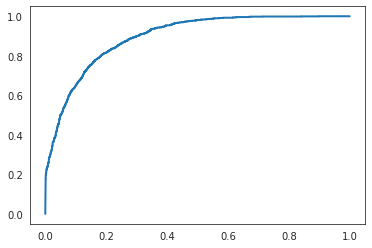

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_roc[:,1],pos_label = ' >50K',drop_intermediate=False) # for threshold
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)

In [ ]:
fpr.shape

(5547,)

In [ ]:
tpr.shape

(5547,)

In [ ]:
thresholds.shape

(5547,)

In [ ]:
scores=y_pred_roc[:,1]
scores_serie=pd.Series(scores)
scores_serie.unique().shape

(5546,)

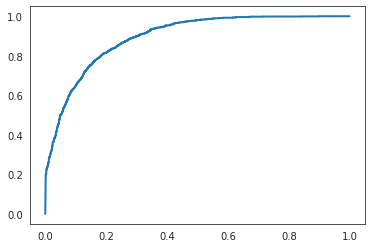

In [ ]:
#ROC Curve with Binary Target

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_roc, y_pred_roc[:,1]) 
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)

**Partie 02: BernoulliNB Modelisation**

In [ ]:
X_train

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
8505,27,10,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5738,20,5,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
21720,38,11,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
25379,76,9,0,0,13,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7608,40,10,0,0,32,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319,46,10,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
28378,46,14,0,1977,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
22087,31,10,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
20114,49,4,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.naive_bayes import BernoulliNB

# instantiate the model
bnb = BernoulliNB()

# fit the model
bnb.fit(X_train, y_train)
y_test_pred=bnb.predict(X_test)
bnb.score(X_test,y_test)

0.7483838886126305

In [ ]:
print ((y_test != y_pred).sum())
print ((y_test == y_pred).sum())
print(X_test.shape)

1518
4515
(6033, 103)


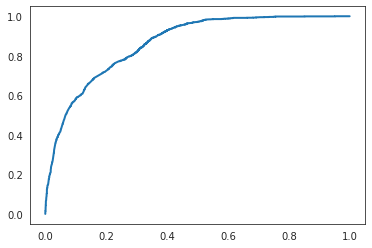

In [ ]:
#ROC Curve

y_pred_roc=bnb.predict_proba(X_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_roc[:,1],pos_label = ' >50K') 
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)

In [ ]:
#Codage one hot : tableau disjonctif

In [ ]:
x

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32556,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32557,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32558,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [ ]:
#Numerical Variables

age_dummies=pd.get_dummies(x.age)
edu_dummies=pd.get_dummies(x.education_num)
gain_dummies=pd.get_dummies(x.capital_gain)
loss_dummies=pd.get_dummies(x.capital_loss)
hours_per_week_dummies=pd.get_dummies(x.hours_per_week)
print(age_dummies.shape)
print(edu_dummies.shape)
print(gain_dummies.shape)
print(loss_dummies.shape)
print(hours_per_week_dummies.shape)

(30161, 72)
(30161, 16)
(30161, 118)
(30161, 90)
(30161, 94)


In [ ]:
age_dummies

,17,18,19,20,21,22,23,24,25,26,...,79,80,81,82,83,84,85,86,88,90
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32558,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x.age.unique().shape

(72,)

In [ ]:
#Categorical Variables
cat_vars=[col for col in x.columns if x[col].dtype=='object']
cat_vars
X_cat=pd.get_dummies(x[cat_vars])
X_cat

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32556,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X_Bernouli=pd.concat([X_cat,age_dummies,edu_dummies,gain_dummies,loss_dummies,hours_per_week_dummies],axis=1)

In [ ]:
X_Bernouli

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,...,89,90,91,92,94,95,96,97,98,99
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32556,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32557,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32558,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Dataset Splitting

from sklearn.model_selection import train_test_split
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_Bernouli, y, test_size = 0.2, random_state = 5)

In [ ]:
from sklearn.naive_bayes import BernoulliNB

# instantiate the model
bnb = BernoulliNB()

# fit the model
bnb.fit(X_train_B.to_numpy(), y_train_B.to_numpy())
bnb.score(X_test_B.to_numpy(),y_test_B.to_numpy())

0.8047405934029505

In [ ]:
print(X_test_B.shape)
print(X_test.shape)

(6033, 488)
(6033, 103)


In [ ]:
#ROC Curve

y_pred_roc_B=bnb.predict_proba(X_test_B.to_numpy())
y_pred_roc_B

array([[9.99972152e-01, 2.78484416e-05],
       [9.91967105e-01, 8.03289524e-03],
       [9.68191274e-01, 3.18087264e-02],
       ...,
       [1.57443423e-03, 9.98425566e-01],
       [9.99998459e-01, 1.54133882e-06],
       [1.43880722e-01, 8.56119278e-01]])

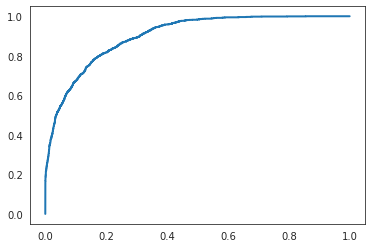

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_B, y_pred_roc_B[:,1],pos_label = ' >50K') # 
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)